# A Practical Guide to Image Manipulation with Pillow and OpenCV

### Part 1: Introduction to Image Manipulation Libraries

Before images are used in advanced deep learning models, they often require modification. This notebook introduces the fundamental operations of two key Python libraries for this purpose: **Pillow** and **OpenCV**.

  * **Pillow (PIL Fork)**: A user-friendly library ideal for common, script-based image processing.
  * **OpenCV (Open Source Computer Vision Library)**: A high-performance library designed for complex computer vision algorithms.

We will use this image of an astronaut for our operations.

<img src="https://c4.wallpaperflare.com/wallpaper/313/812/28/astronaut-moon-nasa-space-wallpaper-preview.jpg" alt="Astronaut" height="300">

In [ ]:
# Import necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the path to a sample image
# Note: You will need to upload an image to your environment
# For this example, we will use 'astronaut.png'
!wget https://c4.wallpaperflare.com/wallpaper/313/812/28/astronaut-moon-nasa-space-wallpaper-preview.jpg -O astronaut.png
image_path = 'astronaut.png'

--2025-08-06 17:23:07--  https://c4.wallpaperflare.com/wallpaper/313/812/28/astronaut-moon-nasa-space-wallpaper-preview.jpg
Resolving c4.wallpaperflare.com (c4.wallpaperflare.com)... 104.21.77.174, 172.67.210.157, 2606:4700:3031::6815:4dae, ...
Connecting to c4.wallpaperflare.com (c4.wallpaperflare.com)|104.21.77.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200735 (196K) [image/jpeg]
Saving to: ‘astronaut.png’

astronaut.png       100%[===================>] 196.03K  --.-KB/s    in 0.03s   

2025-08-06 17:23:07 (5.52 MB/s) - ‘astronaut.png’ saved [200735/200735]



-----

### Part 2: Everyday Image Tasks with Pillow

Pillow is effective for straightforward image modifications.

#### 2.1 Loading, Inspecting, and Displaying

We can load an image and view its core properties.

Image Format: JPEG
Image Size (Width, Height): (728, 761)
Image Mode: RGB


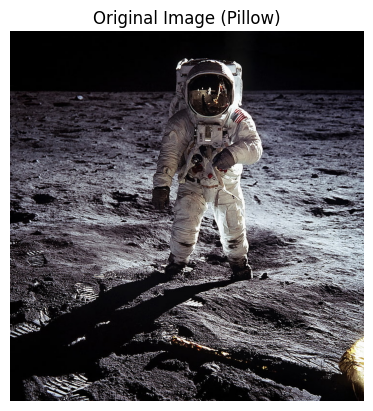

In [ ]:
# Open the image using Pillow
pil_image = Image.open(image_path)

# Inspect image properties
print(f"Image Format: {pil_image.format}")
print(f"Image Size (Width, Height): {pil_image.size}")
print(f"Image Mode: {pil_image.mode}")

# Display the image
plt.imshow(pil_image)
plt.title("Original Image (Pillow)")
plt.axis('off')
plt.show()

#### 2.2 Essential Transformations

Pillow can perform common transformations with simple commands.

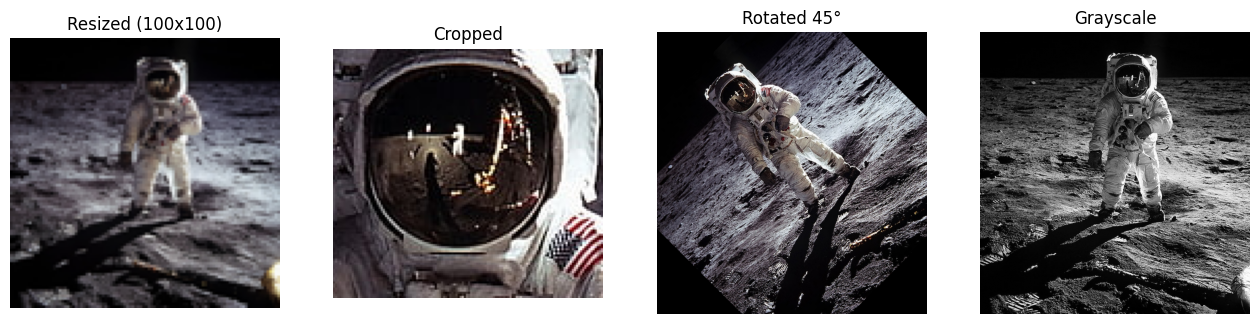

In [ ]:
# 1. Resize the image
resized_image = pil_image.resize((100, 100))

# 2. Crop the image (left, top, right, bottom)
# Here we crop the face of the astronaut
cropped_image = pil_image.crop((350, 80, 480, 200))

# 3. Rotate the image by 45 degrees
rotated_image = pil_image.rotate(45)

# 4. Convert the image to grayscale
grayscale_image = pil_image.convert('L')

# Visualize the transformations
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(resized_image)
axes[0].set_title("Resized (100x100)")
axes[1].imshow(cropped_image)
axes[1].set_title("Cropped")
axes[2].imshow(rotated_image)
axes[2].set_title("Rotated 45°")
axes[3].imshow(grayscale_image, cmap='gray')
axes[3].set_title("Grayscale")

for ax in axes:
    ax.axis('off')
plt.show()

#### 2.3 Practical Example: Saving a Thumbnail

A common use case for Pillow is creating and saving smaller versions of images.

In [ ]:
# Create a thumbnail (maintains aspect ratio)
thumbnail_image = pil_image.copy()
thumbnail_image.thumbnail((128, 128))

# Save the thumbnail to a file
thumbnail_path = 'astronaut_thumbnail.jpg'
thumbnail_image.save(thumbnail_path)

print(f"Thumbnail saved to {thumbnail_path}")
print(f"Thumbnail size: {thumbnail_image.size}")

Thumbnail saved to astronaut_thumbnail.jpg
Thumbnail size: (122, 128)


-----

### Part 3: Power and Precision with OpenCV

OpenCV is built for performance and provides access to advanced computer vision functions.

#### 3.1 The OpenCV Way of Handling Images

OpenCV loads images directly into NumPy arrays but uses a BGR color channel order by default.

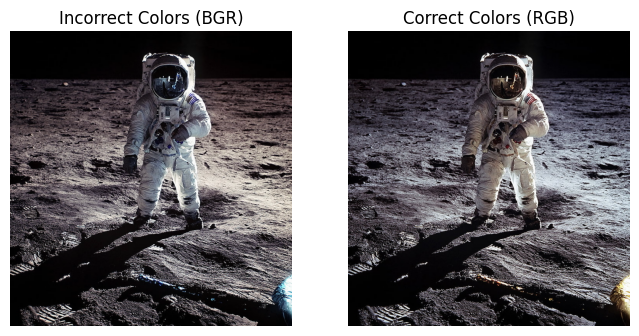

In [ ]:
# Load the image using OpenCV
cv2_image = cv2.imread(image_path)

# OpenCV loads images in BGR format. Matplotlib expects RGB.
# We must convert the color channels for correct display.
cv2_image_rgb = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

# Display the original BGR and corrected RGB images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(cv2_image)
axes[0].set_title("Incorrect Colors (BGR)")
axes[1].imshow(cv2_image_rgb)
axes[1].set_title("Correct Colors (RGB)")

for ax in axes:
    ax.axis('off')
plt.show()

#### 3.2 Manipulations and Drawing

OpenCV is excellent for annotating images with shapes and text.

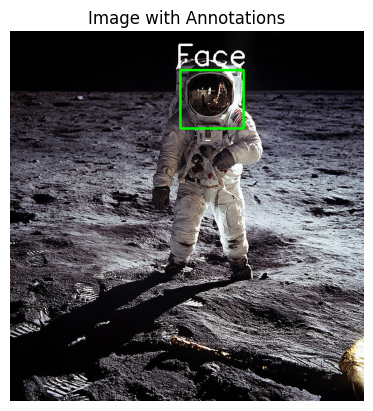

In [ ]:
# Work with a copy to keep the original intact
image_to_draw_on = cv2_image_rgb.copy()

# 1. Draw a rectangle (bounding box)
# cv2.rectangle(image, start_point, end_point, color, thickness)
cv2.rectangle(image_to_draw_on, (350, 80), (480, 200), (0, 255, 0), 3) # Green box

# 2. Add text
# cv2.putText(image, text, position, font, font_scale, color, thickness)
cv2.putText(image_to_draw_on, 'Face', (340, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3) # White text

# Display the annotated image
plt.imshow(image_to_draw_on)
plt.title("Image with Annotations")
plt.axis('off')
plt.show()

#### 3.3 Introduction to Computer Vision

OpenCV provides tools for image analysis, such as blurring and edge detection.

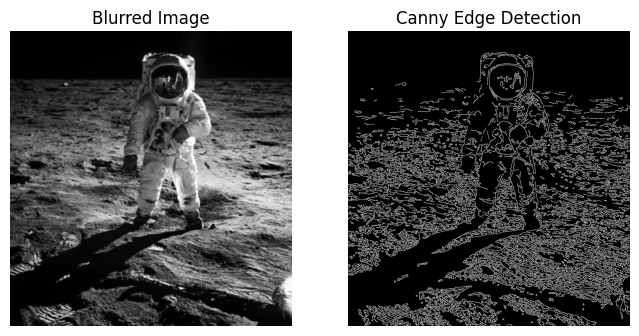

In [ ]:
# 1. Image Blurring (to reduce noise)
# We use the original grayscale image for these operations
gray_image_cv = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image_cv, (5, 5), 0)

# 2. Edge Detection (Canny)
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(blurred_image, cmap='gray')
axes[0].set_title("Blurred Image")
axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Canny Edge Detection")

for ax in axes:
    ax.axis('off')
plt.show()

-----

### Part 4: Conclusion: Pillow vs. OpenCV

Both libraries are powerful, but they are designed for different primary purposes.

  * **Pillow** is best for simple, script-based operations like format conversion and basic transformations.
  * **OpenCV** is the standard for performance-critical applications and provides a vast library of computer vision algorithms.

| Feature              | Pillow                                       | OpenCV                                                              |
| :------------------- | :------------------------------------------- | :------------------------------------------------------------------ |
| **Primary Use Case** | General-purpose tasks, web, scripting        | Computer vision, high-performance analysis                          |
| **Ease of Use** | Very intuitive and "Pythonic"                | Steeper learning curve, C++ backend feel                            |
| **Image Format** | Loads as a Pillow Image object (RGB)         | Loads directly as a NumPy array (BGR)                               |
| **Capabilities** | Cropping, resizing, rotation, format changes | All of Pillow's Capabilities + filtering, drawing, feature detection, and more. |